# NS Shop+편성데이터(NS홈쇼핑) 를 활용하여 방송편성표에 따른
# 판매실적을 예측하고, 최적 수익을 고려한 요일별/ 시간대별 / 카테고리별 편성
# 최적화 방안(모형) 제시

In [556]:
import pandas as pd

In [557]:
실적데이터 = pd.read_excel(
    r'./01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx', header=1)
시청률데이터 = pd.read_excel(
    r'./01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx', header=1)
평가데이터 = pd.read_excel(
    r'./02_평가데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx', header=1)

In [558]:
# 19년1월~19년12월 프로그램별 실적 데이터  
실적데이터

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.00000
1,2019-01-01 06:00:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.00000
2,2019-01-01 06:20:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.00000
3,2019-01-01 06:20:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.00000
4,2019-01-01 06:40:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.00000
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.00000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,nan
38305,2020-01-01 00:40:00,20.00000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,nan
38306,2020-01-01 01:00:00,20.00000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,nan
38307,2020-01-01 01:20:00,20.00000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,nan


In [559]:
# 요일별/시간대별 분단위 시청률 데이터 (단위 %)
시청률데이터

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00300
1,02:01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01200,0.00300
2,02:02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400
3,02:03,0.00000,0.00000,0.01400,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400
4,02:04,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.00000,0.00000,0.00000,0.00000,0.02700,0.00000,0.00000,0.00000,0.00000,...,0.01300,0.00000,0.00000,0.00000,0.01500,0.00000,0.00000,0.00000,0.00000,0.00400
1437,01:57,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400,...,0.01300,0.00000,0.00000,0.00000,0.01500,0.00000,0.00000,0.00000,0.00000,0.00400
1438,01:58,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400,...,0.01300,0.01700,0.00000,0.00000,0.01500,0.00000,0.00000,0.01900,0.00000,0.00400
1439,01:59,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400,...,0.01300,0.00000,0.00000,0.00000,0.01500,0.00000,0.00000,0.00000,0.00000,0.00400


In [560]:
실적데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [561]:
시청률데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Columns: 367 entries, 시간대 to 2019-01-01 to 2019-12-31
dtypes: float64(366), object(1)
memory usage: 4.0+ MB


In [562]:
실적데이터.columns=['방송일시', '노출', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액']

In [563]:
# 결측값 처리 
# 1. 판매단가가 0인 데이터 제거
실적데이터.취급액.fillna(0, inplace=True)

In [564]:
# 2. 노출값이 nan인 항목은 바로 위 항목으로 채우기
실적데이터.노출.fillna(method='ffill', inplace=True)

In [565]:
실적데이터[실적데이터['상품군']=='무형'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 2318 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    937 non-null    datetime64[ns]
 1   노출      937 non-null    float64       
 2   마더코드    937 non-null    int64         
 3   상품코드    937 non-null    int64         
 4   상품명     937 non-null    object        
 5   상품군     937 non-null    object        
 6   판매단가    937 non-null    int64         
 7   취급액     937 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 65.9+ KB


In [566]:
실적데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출      38309 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     38309 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [567]:
실적데이터=실적데이터[실적데이터.방송일시<'2020-01-01']

In [568]:
import matplotlib.pyplot as plt
%matplotlib inline

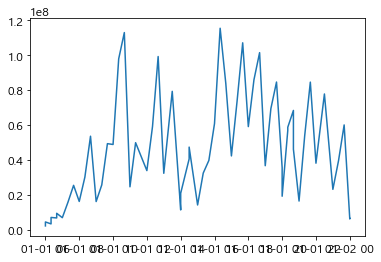

In [569]:
실적데이터_1 = 실적데이터[실적데이터.방송일시<='2019-01-02']
plt.plot(실적데이터_1.방송일시, 실적데이터_1.취급액)

In [570]:
실적데이터.상품군.unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '무형',
       '가구', '침구'], dtype=object)

In [571]:
# 주문량 = 취급액 / 판매단가 round(x[1]/x[0], 3) if x[0]!=0 else 0
실적데이터['주문량'] = (실적데이터.취급액/실적데이터.판매단가).fillna(0)

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [572]:
실적데이터['월']=실적데이터.방송일시.dt.month
실적데이터['일']=실적데이터.방송일시.dt.day
실적데이터['요일']=실적데이터.방송일시.dt.weekday
실적데이터['시간']=실적데이터.방송일시.dt.time

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [573]:
실적데이터.시간

0        06:00:00
1        06:00:00
2        06:20:00
3        06:20:00
4        06:40:00
           ...   
38295    23:20:00
38296    23:40:00
38297    23:40:00
38298    23:40:00
38299    23:40:00
Name: 시간, Length: 38300, dtype: object

In [574]:
실적데이터['시간'] = 실적데이터.시간.apply(lambda x : str(x)).apply(lambda x : int(x.split(':')[0])*60 + int(x.split(':')[1]))

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [575]:
실적데이터['방송날짜'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[0])

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [576]:
실적데이터['방송시간'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[1][:-3])

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [577]:
import datetime

In [578]:
실적데이터

,방송일시,노출,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,일,요일,시간,방송날짜,방송시간
0,2019-01-01 06:00:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.00000,52.60652,1,1,1,360,2019-01-01,06:00
1,2019-01-01 06:00:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.00000,109.54887,1,1,1,360,2019-01-01,06:00
2,2019-01-01 06:20:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.00000,81.75439,1,1,1,380,2019-01-01,06:20
3,2019-01-01 06:20:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.00000,174.31078,1,1,1,380,2019-01-01,06:20
4,2019-01-01 06:40:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.00000,167.21805,1,1,1,400,2019-01-01,06:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.00000,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.00000,11.24324,12,31,1,1400,2019-12-31,23:20
38296,2019-12-31 23:40:00,20.00000,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.00000,51.39888,12,31,1,1420,2019-12-31,23:40
38297,2019-12-31 23:40:00,20.00000,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.00000,90.96429,12,31,1,1420,2019-12-31,23:40
38298,2019-12-31 23:40:00,20.00000,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.00000,14.73418,12,31,1,1420,2019-12-31,23:40


In [579]:
시청률데이터.set_index('시간대', inplace=True)
시청률데이터.rename(columns={'2019-01-01 to 2019-12-31' : '년평균'}, inplace=True)
시청률데이터.rename(index={'월화수목금토일02:00-01:59' : '일평균'}, inplace=True)

In [580]:
시청률데이터.index

Index(['02:00', '02:01', '02:02', '02:03', '02:04', '02:05', '02:06', '02:07',
       '02:08', '02:09',
       ...
       '01:51', '01:52', '01:53', '01:54', '01:55', '01:56', '01:57', '01:58',
       '01:59', '일평균'],
      dtype='object', name='시간대', length=1441)

In [581]:
시청률데이터1 = 시청률데이터.loc[:"01:59",:"2019-12-31"]

In [582]:
시청률데이터1

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
02:01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00500,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01200
02:02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00500,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
02:03,0.00000,0.00000,0.01400,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00500,...,0.00000,0.00000,0.00000,0.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
02:04,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00500,...,0.00000,0.00000,0.00000,0.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400,0.00000,...,0.00000,0.01300,0.00000,0.00000,0.00000,0.01500,0.00000,0.00000,0.00000,0.00000
01:56,0.00000,0.00000,0.00000,0.00000,0.02700,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.01300,0.00000,0.00000,0.00000,0.01500,0.00000,0.00000,0.00000,0.00000
01:57,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00400,0.00000,...,0.00000,0.01300,0.00000,0.00000,0.00000,0.01500,0.00000,0.00000,0.00000,0.00000


In [583]:
분당평균시청률=[]
for i in range(len(실적데이터)):
    시작=실적데이터.방송시간.iloc[i]
    종료=str(pd.to_datetime(실적데이터.방송시간.iloc[i])+datetime.timedelta(minutes=round(float(실적데이터.노출.iloc[i]),0)-1)).split(" ")[1][:-3]
    분당평균시청률.append((시청률데이터1[실적데이터.방송날짜.iloc[i]].loc[시작:종료].mean()))
    
분당평균시청률

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0017500000000000003,
 0.0,
 0.0005499999999999999,
 0.00015000000000000001,
 0.0005499999999999999,
 0.004149999999999999,
 0.006150000000000001,
 0.0,
 0.0,
 0.0075,
 0.010000000000000002,
 0.010000000000000002,
 0.010000000000000004,
 0.010000000000000004,
 0.005900000000000001,
 0.005900000000000001,
 0.0033666666666666667,
 0.0033666666666666667,
 0.008400000000000001,
 0.012900000000000003,
 0.012,
 0.007600000000000001,
 0.0005,
 0.0030499999999999998,
 0.0007,
 0.0008500000000000001,
 0.0,
 0.0,
 0.013500000000000002,
 0.020149999999999998,
 0.0021,
 0.0021000000000000003,
 0.0,
 0.0,
 0.0,
 0.00035,
 0.00035,
 0.001,
 0.001,
 0.0,
 0.0007,
 0.0066,
 0.0008,
 0.005933333333333333,
 0.00095,
 0.0006000000000000001,
 0.0,
 0.005900000000000001,
 0.005900000000000001,
 0.007050000000000001,
 0.007050000000000001,
 0.0007,
 0.0007,
 0.00195,
 0.0,
 0.0,
 0.0006000000000000001,
 0.00015000000000000001,
 0.0010999999

In [584]:
실적데이터['분당평균시청률']=분당평균시청률

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [585]:
실적데이터

,방송일시,노출,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,일,요일,시간,방송날짜,방송시간,분당평균시청률
0,2019-01-01 06:00:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.00000,52.60652,1,1,1,360,2019-01-01,06:00,0.00000
1,2019-01-01 06:00:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.00000,109.54887,1,1,1,360,2019-01-01,06:00,0.00000
2,2019-01-01 06:20:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.00000,81.75439,1,1,1,380,2019-01-01,06:20,0.00000
3,2019-01-01 06:20:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.00000,174.31078,1,1,1,380,2019-01-01,06:20,0.00000
4,2019-01-01 06:40:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.00000,167.21805,1,1,1,400,2019-01-01,06:40,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.00000,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.00000,11.24324,12,31,1,1400,2019-12-31,23:20,0.00000
38296,2019-12-31 23:40:00,20.00000,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.00000,51.39888,12,31,1,1420,2019-12-31,23:40,0.02060
38297,2019-12-31 23:40:00,20.00000,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.00000,90.96429,12,31,1,1420,2019-12-31,23:40,0.02060
38298,2019-12-31 23:40:00,20.00000,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.00000,14.73418,12,31,1,1420,2019-12-31,23:40,0.02060


In [586]:
실적데이터_final = 실적데이터.drop(['방송날짜', '방송시간'],axis=1)

In [587]:
실적데이터_final

,방송일시,노출,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,일,요일,시간,분당평균시청률
0,2019-01-01 06:00:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.00000,52.60652,1,1,1,360,0.00000
1,2019-01-01 06:00:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.00000,109.54887,1,1,1,360,0.00000
2,2019-01-01 06:20:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.00000,81.75439,1,1,1,380,0.00000
3,2019-01-01 06:20:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.00000,174.31078,1,1,1,380,0.00000
4,2019-01-01 06:40:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.00000,167.21805,1,1,1,400,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.00000,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.00000,11.24324,12,31,1,1400,0.00000
38296,2019-12-31 23:40:00,20.00000,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.00000,51.39888,12,31,1,1420,0.02060
38297,2019-12-31 23:40:00,20.00000,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.00000,90.96429,12,31,1,1420,0.02060
38298,2019-12-31 23:40:00,20.00000,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.00000,14.73418,12,31,1,1420,0.02060


In [588]:
len(실적데이터_final.상품코드.unique())

2122

In [589]:
len(실적데이터_final.상품명.unique())

1768

In [590]:
평가데이터

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan
1,2020-06-01 06:40:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan
2,2020-06-01 07:00:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan
3,2020-06-01 07:20:00,20.00000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,nan
4,2020-06-01 07:40:00,20.00000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,nan
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.00000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,nan
2887,2020-07-01 00:40:00,20.00000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,nan
2888,2020-07-01 01:00:00,20.00000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,nan
2889,2020-07-01 01:20:00,20.00000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,nan


In [591]:
평가데이터.상품군.unique()

array(['의류', '속옷', '이미용', '주방', '농수축', '무형', '가전', '생활용품', '가구', '잡화',
       '건강기능', '침구'], dtype=object)

# 학습/분석

In [592]:
import numpy as np

In [593]:
상품명=실적데이터.상품명.unique()
상품명.sort()
상품명

array(['  뉴트리원 다이어트 구미', ' [가이거] 블랙 에디션 다이아몬드 워치(남성용)',
       ' [가이거] 블랙 에디션 다이아몬드 워치(여성용)', ..., '휴테크 안마의자',
       '히트융 극세사 퍼융기모 남성 동내의 패키지', '히트융 극세사 퍼융기모 여성 동내의 패키지'], dtype=object)

In [594]:
상품군=실적데이터.상품군.unique()
상품군.sort()
상품군

array(['가구', '가전', '건강기능', '농수축', '무형', '생활용품', '속옷', '의류', '이미용', '잡화',
       '주방', '침구'], dtype=object)

In [595]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
result=le1.fit_transform(실적데이터_final.상품군)
실적데이터_final['상품군라벨']=result

In [596]:
le1.classes_

array(['가구', '가전', '건강기능', '농수축', '무형', '생활용품', '속옷', '의류', '이미용', '잡화',
       '주방', '침구'], dtype=object)

In [597]:
실적데이터_final

,방송일시,노출,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,일,요일,시간,분당평균시청률,상품군라벨
0,2019-01-01 06:00:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.00000,52.60652,1,1,1,360,0.00000,7
1,2019-01-01 06:00:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.00000,109.54887,1,1,1,360,0.00000,7
2,2019-01-01 06:20:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.00000,81.75439,1,1,1,380,0.00000,7
3,2019-01-01 06:20:00,20.00000,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.00000,174.31078,1,1,1,380,0.00000,7
4,2019-01-01 06:40:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.00000,167.21805,1,1,1,400,0.00000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.00000,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.00000,11.24324,12,31,1,1400,0.00000,10
38296,2019-12-31 23:40:00,20.00000,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.00000,51.39888,12,31,1,1420,0.02060,10
38297,2019-12-31 23:40:00,20.00000,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.00000,90.96429,12,31,1,1420,0.02060,10
38298,2019-12-31 23:40:00,20.00000,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.00000,14.73418,12,31,1,1420,0.02060,10


In [598]:
le2=LabelEncoder()
result1=le2.fit_transform(실적데이터_final.상품명)
실적데이터_final['상품명라벨']=result1

In [599]:
le2.classes_

array(['  뉴트리원 다이어트 구미', ' [가이거] 블랙 에디션 다이아몬드 워치(남성용)',
       ' [가이거] 블랙 에디션 다이아몬드 워치(여성용)', ..., '휴테크 안마의자',
       '히트융 극세사 퍼융기모 남성 동내의 패키지', '히트융 극세사 퍼융기모 여성 동내의 패키지'], dtype=object)

In [600]:
실적데이터_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38300 entries, 0 to 38299
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     38300 non-null  datetime64[ns]
 1   노출       38300 non-null  float64       
 2   마더코드     38300 non-null  int64         
 3   상품코드     38300 non-null  int64         
 4   상품명      38300 non-null  object        
 5   상품군      38300 non-null  object        
 6   판매단가     38300 non-null  int64         
 7   취급액      38300 non-null  float64       
 8   주문량      38300 non-null  float64       
 9   월        38300 non-null  int64         
 10  일        38300 non-null  int64         
 11  요일       38300 non-null  int64         
 12  시간       38300 non-null  int64         
 13  분당평균시청률  38300 non-null  float64       
 14  상품군라벨    38300 non-null  int32         
 15  상품명라벨    38300 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(7), object(2)
memory usage

In [601]:
실적데이터_final.drop(['상품명', '상품군', '취급액'], axis=1, inplace=True)

In [602]:
실적데이터_final

,방송일시,노출,마더코드,상품코드,판매단가,주문량,월,일,요일,시간,분당평균시청률,상품군라벨,상품명라벨
0,2019-01-01 06:00:00,20.00000,100346,201072,39900,52.60652,1,1,1,360,0.00000,7,1590
1,2019-01-01 06:00:00,20.00000,100346,201079,39900,109.54887,1,1,1,360,0.00000,7,1596
2,2019-01-01 06:20:00,20.00000,100346,201072,39900,81.75439,1,1,1,380,0.00000,7,1590
3,2019-01-01 06:20:00,20.00000,100346,201079,39900,174.31078,1,1,1,380,0.00000,7,1596
4,2019-01-01 06:40:00,20.00000,100346,201072,39900,167.21805,1,1,1,400,0.00000,7,1590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.00000,100448,201391,148000,11.24324,12,31,1,1400,0.00000,10,1414
38296,2019-12-31 23:40:00,20.00000,100448,201383,178000,51.39888,12,31,1,1420,0.02060,10,821
38297,2019-12-31 23:40:00,20.00000,100448,201390,168000,90.96429,12,31,1,1420,0.02060,10,1413
38298,2019-12-31 23:40:00,20.00000,100448,201384,158000,14.73418,12,31,1,1420,0.02060,10,822


In [603]:
실적데이터_final.columns

Index(['방송일시', '노출', '마더코드', '상품코드', '판매단가', '주문량', '월', '일', '요일', '시간',
       '분당평균시청률', '상품군라벨', '상품명라벨'],
      dtype='object')

In [604]:
# 통계
pd.options.display.float_format = '{:.5f}'.format

In [605]:
주문량_월_요일=실적데이터_final.pivot_table(index=['월','요일'],values='주문량', aggfunc='sum')

In [606]:
주문량_요일=실적데이터_final.pivot_table(index=['요일'],values='주문량', aggfunc='sum')

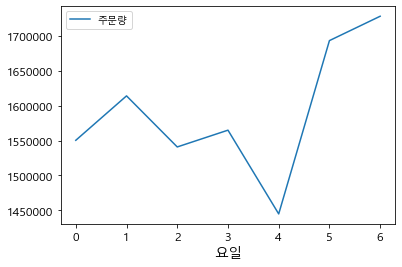

In [607]:
주문량_요일.plot()

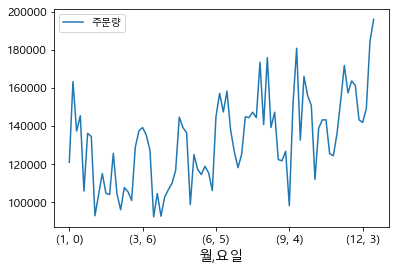

In [608]:
# 주문량_월_요일.plot()
주문량_월_요일.plot()

In [609]:
실적데이터_final.상품군라벨.unique()

array([ 7,  6, 10,  3,  8,  1,  5,  2,  9,  4,  0, 11])

In [610]:
실적_상품군=[]
for i in range(11):
    실적_상품군.append(실적데이터_final[실적데이터_final.상품군라벨==i])
실적_상품군[0]

,방송일시,노출,마더코드,상품코드,판매단가,주문량,월,일,요일,시간,분당평균시청률,상품군라벨,상품명라벨
2952,2019-02-01 22:00:00,20.00000,100205,200733,548000,13.50182,2,1,4,1320,0.00150,0,875
2953,2019-02-01 22:00:00,20.00000,100205,200732,598000,5.45819,2,1,4,1320,0.00150,0,874
2954,2019-02-01 22:00:00,20.00000,100205,200731,648000,8.13426,2,1,4,1320,0.00150,0,873
2955,2019-02-01 22:20:00,20.00000,100205,200733,548000,37.66058,2,1,4,1340,0.00210,0,875
2956,2019-02-01 22:20:00,20.00000,100205,200732,598000,29.60033,2,1,4,1340,0.00210,0,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38266,2019-12-31 19:40:00,20.00000,100594,201821,649000,19.72727,12,31,1,1180,0.00555,0,530
38267,2019-12-31 19:40:00,20.00000,100594,201823,699000,17.53791,12,31,1,1180,0.00555,0,531
38268,2019-12-31 20:00:00,20.00000,100594,201819,599000,28.45409,12,31,1,1200,0.00230,0,529
38269,2019-12-31 20:00:00,20.00000,100594,201821,649000,15.35593,12,31,1,1200,0.00230,0,530


In [611]:
실적_상품군[0]

,방송일시,노출,마더코드,상품코드,판매단가,주문량,월,일,요일,시간,분당평균시청률,상품군라벨,상품명라벨
2952,2019-02-01 22:00:00,20.00000,100205,200733,548000,13.50182,2,1,4,1320,0.00150,0,875
2953,2019-02-01 22:00:00,20.00000,100205,200732,598000,5.45819,2,1,4,1320,0.00150,0,874
2954,2019-02-01 22:00:00,20.00000,100205,200731,648000,8.13426,2,1,4,1320,0.00150,0,873
2955,2019-02-01 22:20:00,20.00000,100205,200733,548000,37.66058,2,1,4,1340,0.00210,0,875
2956,2019-02-01 22:20:00,20.00000,100205,200732,598000,29.60033,2,1,4,1340,0.00210,0,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38266,2019-12-31 19:40:00,20.00000,100594,201821,649000,19.72727,12,31,1,1180,0.00555,0,530
38267,2019-12-31 19:40:00,20.00000,100594,201823,699000,17.53791,12,31,1,1180,0.00555,0,531
38268,2019-12-31 20:00:00,20.00000,100594,201819,599000,28.45409,12,31,1,1200,0.00230,0,529
38269,2019-12-31 20:00:00,20.00000,100594,201821,649000,15.35593,12,31,1,1200,0.00230,0,530


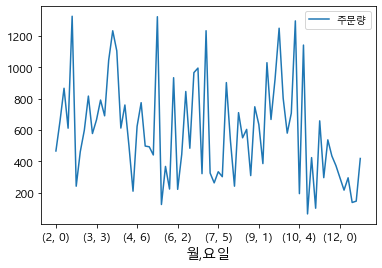

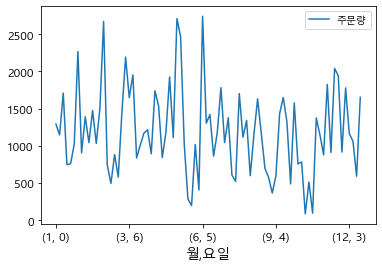

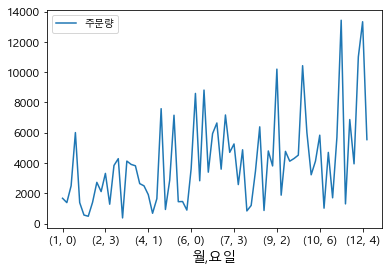

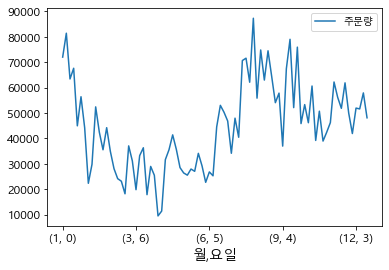

G:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


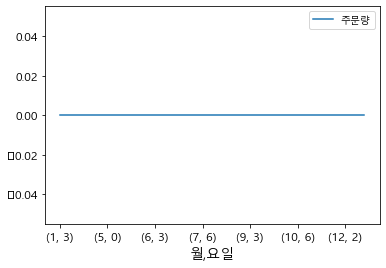

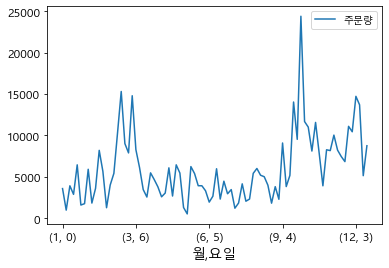

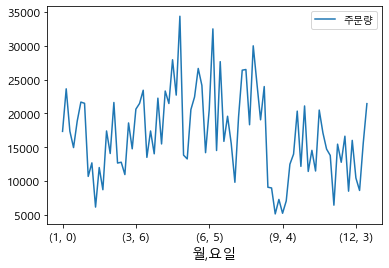

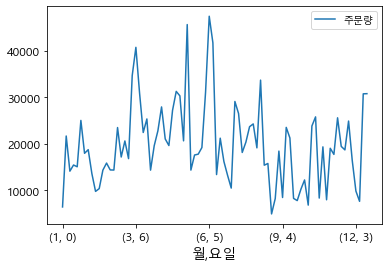

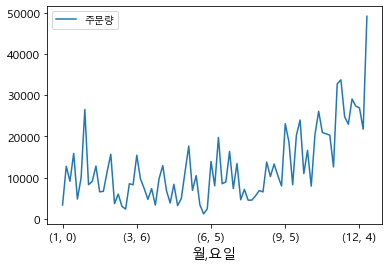

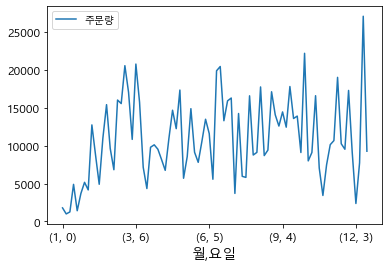

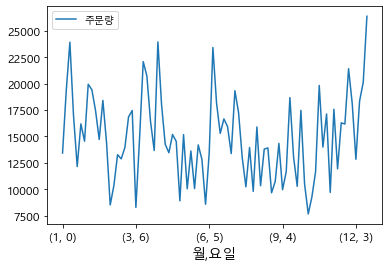

In [612]:
for item in 실적_상품군:
    실적_상품군_월_요일=item.pivot_table(index=['월','요일'],values='주문량', aggfunc='sum')
    실적_상품군_월_요일.plot()


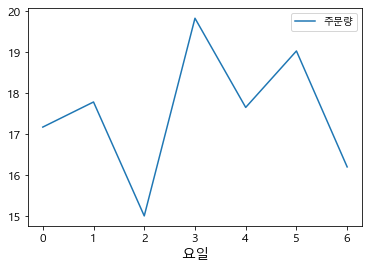

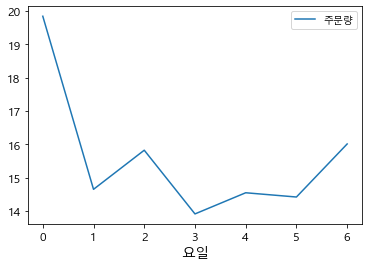

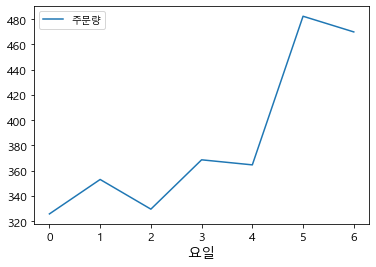

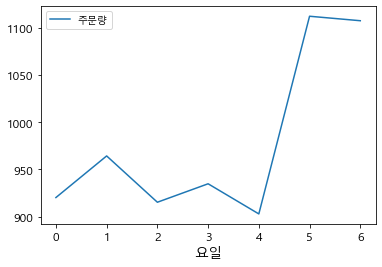

G:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


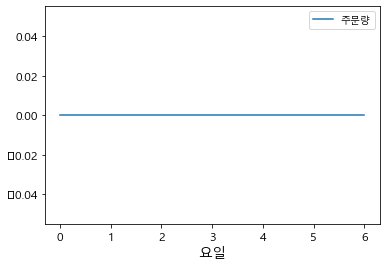

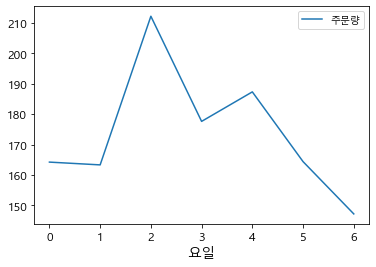

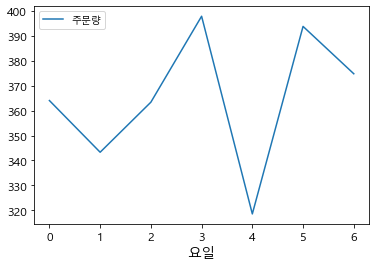

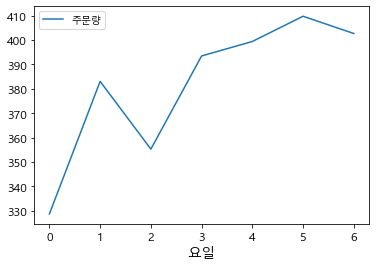

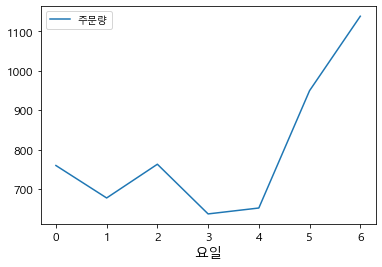

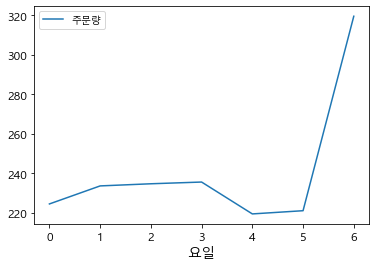

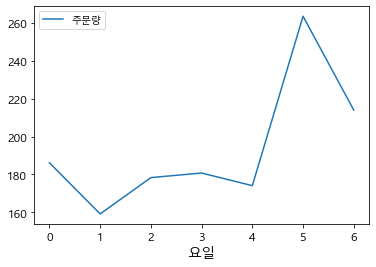

In [613]:
for item in 실적_상품군:
    실적_상품군_요일=item.pivot_table(index=['요일'],values='주문량', aggfunc='mean')
    실적_상품군_요일.plot()

In [614]:
from sklearn.svm import SVC
import seaborn as sns
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'



X=실적데이터_final[['노출', '마더코드', '상품코드', '판매단가', '월', '일', '요일',
       '시간', '분당평균시청률', '상품군라벨', '상품명라벨']]
y=실적데이터_final['주문량']



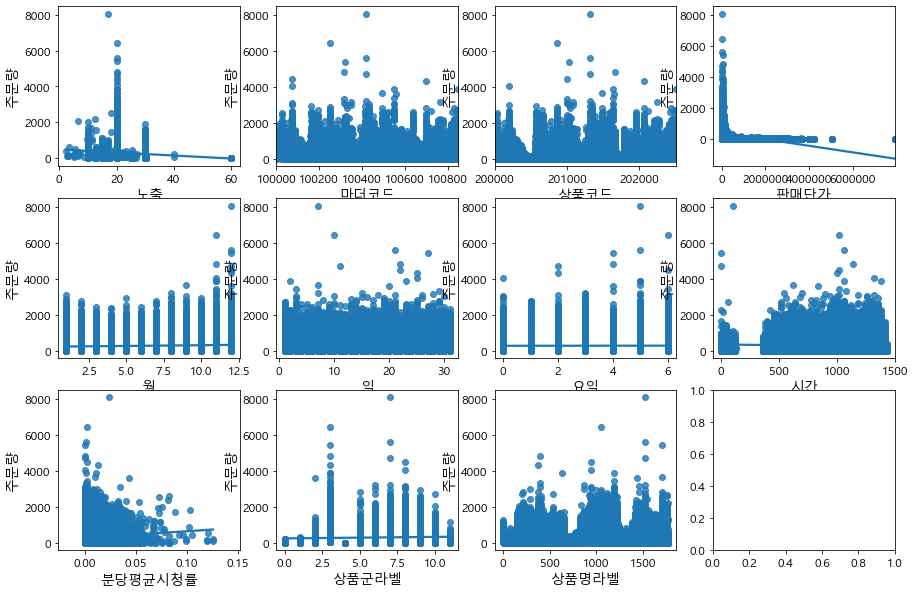

In [615]:
fig, axs = plt.subplots(figsize=(15,10), nrows=3, ncols=4)

for i, feature in enumerate(['노출', '마더코드', '상품코드', '판매단가', '월', '일', '요일',
       '시간', '분당평균시청률', '상품군라벨', '상품명라벨']):
    r = int(i/4)
    c = i%4
    sns.regplot(x=feature, y='주문량', data=실적데이터_final, ax=axs[r][c])



In [616]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mt

X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mt.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y_pred)
print(mse, rmse, r2)

142335.14145593802 377.2732980956087 0.1591092576634705


In [617]:
X

,노출,마더코드,상품코드,판매단가,월,일,요일,시간,분당평균시청률,상품군라벨,상품명라벨
0,20.00000,100346,201072,39900,1,1,1,360,0.00000,7,1590
1,20.00000,100346,201079,39900,1,1,1,360,0.00000,7,1596
2,20.00000,100346,201072,39900,1,1,1,380,0.00000,7,1590
3,20.00000,100346,201079,39900,1,1,1,380,0.00000,7,1596
4,20.00000,100346,201072,39900,1,1,1,400,0.00000,7,1590
...,...,...,...,...,...,...,...,...,...,...,...
38295,20.00000,100448,201391,148000,12,31,1,1400,0.00000,10,1414
38296,20.00000,100448,201383,178000,12,31,1,1420,0.02060,10,821
38297,20.00000,100448,201390,168000,12,31,1,1420,0.02060,10,1413
38298,20.00000,100448,201384,158000,12,31,1,1420,0.02060,10,822


In [618]:
temp=실적데이터_final[['방송일시','분당평균시청률']]
temp.set_index('방송일시', inplace=True)
temp

,분당평균시청률
방송일시,
2019-01-01 06:00:00,0.00000
2019-01-01 06:00:00,0.00000
2019-01-01 06:20:00,0.00000
2019-01-01 06:20:00,0.00000
2019-01-01 06:40:00,0.00000
...,...
2019-12-31 23:20:00,0.00000
2019-12-31 23:40:00,0.02060
2019-12-31 23:40:00,0.02060


In [619]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

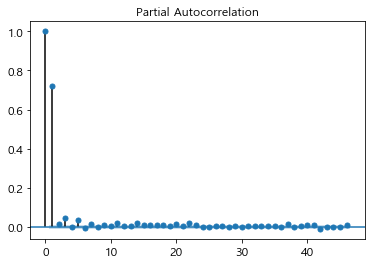

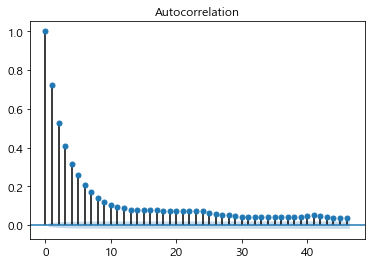

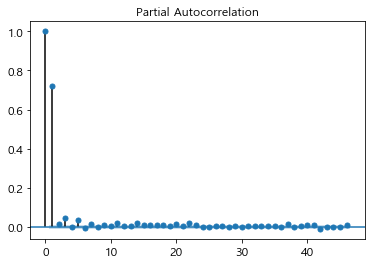

In [620]:
plot_acf(temp)
plot_pacf(temp)

In [621]:
X

,노출,마더코드,상품코드,판매단가,월,일,요일,시간,분당평균시청률,상품군라벨,상품명라벨
0,20.00000,100346,201072,39900,1,1,1,360,0.00000,7,1590
1,20.00000,100346,201079,39900,1,1,1,360,0.00000,7,1596
2,20.00000,100346,201072,39900,1,1,1,380,0.00000,7,1590
3,20.00000,100346,201079,39900,1,1,1,380,0.00000,7,1596
4,20.00000,100346,201072,39900,1,1,1,400,0.00000,7,1590
...,...,...,...,...,...,...,...,...,...,...,...
38295,20.00000,100448,201391,148000,12,31,1,1400,0.00000,10,1414
38296,20.00000,100448,201383,178000,12,31,1,1420,0.02060,10,821
38297,20.00000,100448,201390,168000,12,31,1,1420,0.02060,10,1413
38298,20.00000,100448,201384,158000,12,31,1,1420,0.02060,10,822


In [622]:
# 다층신경망

In [666]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


# X=실적데이터_final[['노출', '마더코드', '상품코드', '판매단가', '월', '일', '요일',
#        '시간', '분당평균시청률', '상품군라벨', '상품명라벨']]
# y=실적데이터_final['주문량']

X = 실적데이터_df[['노출', '마더코드', '상품코드', '상품군라벨', '요일', '분당평균시청률', '판매단가']]
y = 실적데이터_df['주문량']

# X1=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
y_test

방송일시
2019-10-26 08:40:00   326.73418
2019-03-01 21:20:00    22.25113
2019-11-07 22:00:00     2.53086
2019-06-21 17:20:00    63.19784
2019-06-06 13:20:00    22.68354
                         ...   
2019-12-18 23:00:00   202.85577
2019-05-19 01:20:00   602.94833
2019-01-29 11:40:00   490.96882
2019-04-17 20:00:00    31.69021
2019-10-03 00:40:00    84.40828
Name: 주문량, Length: 9575, dtype: float64

In [668]:
mlp = MLPRegressor(hidden_layer_sizes=(10,10,10),max_iter=300, solver='lbfgs')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(y_pred)
mse = mt.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y_pred)
print(mse, rmse, r2)

[2.60486102e+02 4.31256842e-02 4.31256842e-02 ... 2.38533978e+02
 4.31256842e-02 1.17829684e+02]
84859.79163739811 291.30704014389715 0.516457228174362


G:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [670]:
from sklearn.model_selection import GridSearchCV

In [674]:
mlp = MLPRegressor(solver='lbfgs')
mlp_params={
    'hidden_layer_sizes' : [(10,10,10),(100,100,100),(200,200,200)],
    'max_iter' : [100,200,300]
}

In [675]:
grid_rf = GridSearchCV(mlp, param_grid=mlp_params, cv = 5)

In [676]:
grid_rf.fit(X_train, y_train)
grid_rf.score(X_test, y_test)

G:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
G:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
G:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

KeyboardInterrupt: 

In [ ]:
print('학습데이터 정확도 ', grid_rf.score(X_train, y_train))
print('테스트데이터 정확도 {:.2f}'.format(grid_rf.score(X_test, y_test)))

In [625]:
# 심층신경망 - LSTM

In [626]:
X=실적데이터_final[['방송일시','노출', '마더코드', '상품코드', '판매단가', '월', '일', '요일',
       '시간', '분당평균시청률', '상품군라벨', '상품명라벨']]
y=실적데이터_final[['방송일시','주문량']]

In [627]:
X.set_index('방송일시', inplace=True)

In [628]:
y.set_index('방송일시', inplace=True)

In [629]:
y

,주문량
방송일시,
2019-01-01 06:00:00,52.60652
2019-01-01 06:00:00,109.54887
2019-01-01 06:20:00,81.75439
2019-01-01 06:20:00,174.31078
2019-01-01 06:40:00,167.21805
...,...
2019-12-31 23:20:00,11.24324
2019-12-31 23:40:00,51.39888
2019-12-31 23:40:00,90.96429


In [630]:
X1

array([[0.30475087, 0.40753828, 0.42658177, ..., 0.        , 0.63636364,
        0.89983022],
       [0.30475087, 0.40753828, 0.42936729, ..., 0.        , 0.63636364,
        0.90322581],
       [0.30475087, 0.40753828, 0.42658177, ..., 0.        , 0.63636364,
        0.89983022],
       ...,
       [0.30475087, 0.52767962, 0.55312376, ..., 0.16401274, 0.90909091,
        0.79966044],
       [0.30475087, 0.52767962, 0.55073617, ..., 0.16401274, 0.90909091,
        0.46519525],
       [0.30475087, 0.52767962, 0.55352169, ..., 0.16401274, 0.90909091,
        0.80022637]])

In [631]:
ts = 12

y["std_value"] = y.주문량.map(lambda x : (x - y.주문량.mean()) / np.std(y.주문량))
X_train = np.asarray([np.array([y.주문량.values[i+j] for j in range(ts)])
                      for i in range(len(y.주문량) - ts)]).reshape(-1,ts,1)
y_train = y.std_value.values[ts:]
X_train.shape, y_train.shape

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((38288, 12, 1), (38288,))

In [632]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping 
scaler = MinMaxScaler()

X1=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X1, y)

K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(100, input_shape=(12,1))) # (timestep, feature) 
model.add(Dense(1, activation="sigmoid")) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam')

In [633]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [634]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [635]:
# tf.compat.v2.disable_eager_execution() #텐서플로우 v2 에서도 실행 가능하게 하기
# tf.compat.v2.random.set_random_seed(777)

In [637]:
history_model = model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10


AssertionError: 

In [ ]:
plt.plot(history_model.history["loss"])
plt.title("Loss")
plt.show()

In [ ]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 후")
plt.show()

In [ ]:
y_pred=model.predict(X_train[:, :, :])
mse = mt.mean_squared_error(y_train[:], y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_train[:], y_pred)
print(mse, rmse, r2)

In [ ]:
X_train.shape

In [638]:
# 심층신경망
from tensorflow import keras
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X=실적데이터_final[['노출', '마더코드', '상품코드', '판매단가', '월', '일', '요일',
       '시간', '분당평균시청률', '상품군라벨', '상품명라벨']]
y=실적데이터_final['주문량']

X1=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X1, y)

X_valid, X_train = X_train[:8000], X_train[8000:]
y_valid, y_train = y_train[:8000], y_train[8000:]

tf.random.set_seed(42)
np.random.seed(42)

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[11]),
#     keras.layers.Dense(300, kernel_initializer="he_normal"),
#     keras.layers.LeakyReLU(),
#     keras.layers.Dense(100, kernel_initializer="he_normal"),
#     keras.layers.LeakyReLU(),
#     keras.layers.Dense(1, activation="softmax")
# ])

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


In [639]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [640]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [642]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5


AssertionError: 

In [ ]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=he_avg_init)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def logit(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [ ]:
X=실적데이터_final[['노출', '마더코드', '상품코드', '판매단가', '월', '일', '요일',
       '시간', '분당평균시청률', '상품군라벨', '상품명라벨']]
y=실적데이터_final['주문량']

X1=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X1, y)

# 데이터 통계

In [643]:
실적데이터_df = 실적데이터_final.set_index('방송일시')

In [653]:
실적데이터_df

,노출,마더코드,상품코드,상품군라벨,요일,분당평균시청률,판매단가,주문량
방송일시,,,,,,,,
2019-01-01 06:00:00,20.00000,100346,201072,7,1,0.00000,39900,52.60652
2019-01-01 06:00:00,20.00000,100346,201079,7,1,0.00000,39900,109.54887
2019-01-01 06:20:00,20.00000,100346,201072,7,1,0.00000,39900,81.75439
2019-01-01 06:20:00,20.00000,100346,201079,7,1,0.00000,39900,174.31078
2019-01-01 06:40:00,20.00000,100346,201072,7,1,0.00000,39900,167.21805
...,...,...,...,...,...,...,...,...
2019-12-31 23:20:00,20.00000,100448,201391,10,1,0.00000,148000,11.24324
2019-12-31 23:40:00,20.00000,100448,201383,10,1,0.02060,178000,51.39888
2019-12-31 23:40:00,20.00000,100448,201390,10,1,0.02060,168000,90.96429


In [646]:
실적데이터_df.drop(['월','일','시간'], axis=1, inplace=True)

In [665]:
실적데이터_df.columns

Index(['노출', '마더코드', '상품코드', '상품군라벨', '요일', '분당평균시청률', '판매단가', '주문량'], dtype='object')

In [652]:
실적데이터_df = 실적데이터_df[['노출', '마더코드', '상품코드', '상품군라벨', '요일', '분당평균시청률', '판매단가', '주문량']]

In [651]:
평가데이터

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan
1,2020-06-01 06:40:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan
2,2020-06-01 07:00:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan
3,2020-06-01 07:20:00,20.00000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,nan
4,2020-06-01 07:40:00,20.00000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,nan
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.00000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,nan
2887,2020-07-01 00:40:00,20.00000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,nan
2888,2020-07-01 01:00:00,20.00000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,nan
2889,2020-07-01 01:20:00,20.00000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,nan


In [655]:
실적데이터_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38300 entries, 2019-01-01 06:00:00 to 2019-12-31 23:40:00
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   노출       38300 non-null  float64
 1   마더코드     38300 non-null  int64  
 2   상품코드     38300 non-null  int64  
 3   상품군라벨    38300 non-null  int32  
 4   요일       38300 non-null  int64  
 5   분당평균시청률  38300 non-null  float64
 6   판매단가     38300 non-null  int64  
 7   주문량      38300 non-null  float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 3.7 MB


In [663]:
temp1 = 실적데이터_df.pivot_table(index=['요일','상품군라벨'], values=['분당평균시청률','주문량'], aggfunc='mean')
temp1

분당평균시청률        주문량
요일 상품군라벨                    
0  0      0.00485   17.17215
   1      0.00275   19.84073
   2      0.00206  325.75192
   3      0.00612  920.26169
   4      0.00592    0.00000
...           ...        ...
6  7      0.00430  402.63740
   8      0.00397 1138.38219
   9      0.00820  319.45729
   10     0.00507  213.91622
   11     0.00291  172.00282

[84 rows x 2 columns]

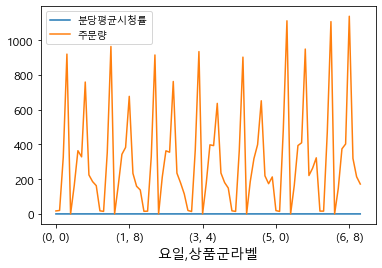

In [677]:
temp1.plot()

In [679]:
from sklearn.preprocessing import StandardScaler

X = 실적데이터_df[['노출', '마더코드', '상품코드', '상품군라벨', '요일', '분당평균시청률', '판매단가']]
y = 실적데이터_df['주문량']

scaler = StandardScaler()
result = scaler.fit_transform(X)
data_scaled = pd.DataFrame(result, columns=X.columns)
data_scaled.describe()

,노출,마더코드,상품코드,상품군라벨,요일,분당평균시청률,판매단가
count,38300.00000,38300.00000,38300.00000,38300.00000,38300.00000,38300.00000,38300.00000
mean,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000
std,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001
min,-5.26247,-1.56434,-1.65826,-1.57340,-1.51077,-0.56138,-0.62889
25%,-0.13027,-0.94418,-0.91067,-1.00094,-1.01304,-0.56138,-0.54764
50%,-0.13027,-0.17999,-0.07200,0.14397,-0.01757,-0.38930,-0.47878
75%,-0.13027,0.82026,0.87404,1.00265,0.97790,0.07777,0.05833
max,11.57817,1.83252,1.75756,1.57510,1.47563,14.87662,10.29237


In [680]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,-0.19155,-0.79877
1,-0.19729,-0.79570
2,-0.19155,-0.79877
3,-0.19729,-0.79570
4,-0.19155,-0.79877
...,...,...
38295,-0.96572,-0.87475
38296,-0.93547,-1.26163
38297,-0.94608,-1.26699
38298,-0.94602,-1.27805


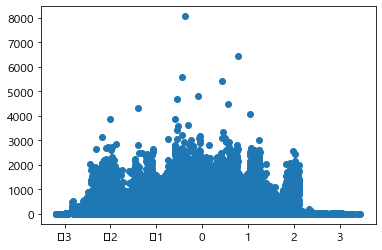

In [684]:
plt.scatter(result.x, y)